# The Best Notebook #
**(at least better than hisham's aka the goat who'll be gone by eid)**

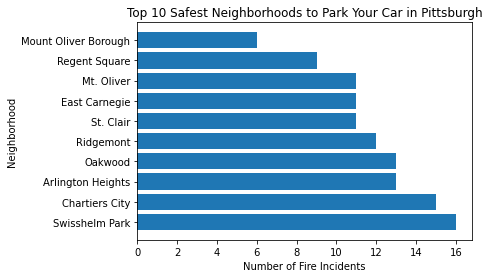

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("fires.csv")

neighborhood_counts = df.groupby('neighborhood').size()

neighborhood_counts = neighborhood_counts.sort_values(ascending=False).tail(10)

plt.barh(neighborhood_counts.index, neighborhood_counts.values)

plt.title("Top 10 Safest Neighborhoods to Park Your Car in Pittsburgh")
plt.xlabel("Number of Fire Incidents")
plt.ylabel("Neighborhood")

plt.show()

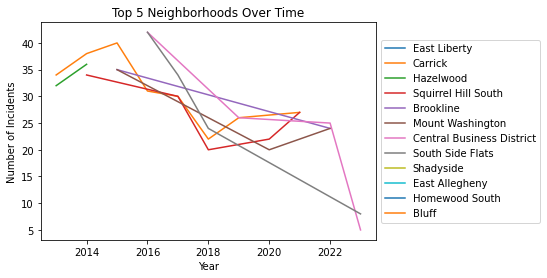

In [11]:
# Convert the alarm_time column to a datetime object
df["alarm_time"] = pd.to_datetime(df["alarm_time"])

# Extract the year from the alarm_time column
df["year"] = df["alarm_time"].dt.year

# Group the data by year and neighborhood, and count the number of incidents
grouped = df.groupby(["year", "neighborhood"]).size().reset_index(name="count")

# Get the top 5 neighborhoods for each year
top5 = grouped.groupby("year").apply(lambda x: x.nlargest(3, "count")).reset_index(drop=True)

# Create a line graph showing the top 5 neighborhoods over time
for neighborhood in top5["neighborhood"].unique():
    plt.plot(top5[top5["neighborhood"]==neighborhood]["year"], top5[top5["neighborhood"]==neighborhood]["count"], label=neighborhood)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Top 5 Neighborhoods Over Time")
plt.show()